In [136]:
from mechanicalsoup import Browser
import pandas as pd

url = "https://www.amazon.in/gp/bestsellers/books/"
browser = Browser()
# Request page
page = browser.get(url)


In [137]:
# Reterving the beautifulsoup object
soup = page.soup

# Getting ranks (bestsellers)
div_ranks = soup.findAll("div", {"class" : "a-section zg-bdg-body zg-bdg-clr-body aok-float-left"})
ranks = [rank.getText() for rank in div_ranks]

# Getting prices
span_prices = soup.findAll("span", {"class":"p13n-sc-price"})
prices = [price.getText() for price in span_prices]

span_reviews = soup.findAll("span", {"class" : "a-icon-alt"})
reviews = [review.getText() for review in span_reviews]

# Getting titles & authors
div_titles_authors = soup.findAll("div", attrs={"class" : "_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y"})
authors = []
titles = []

for index, div in enumerate(div_titles_authors):
    if not index%2:
        titles.append(div.getText())
    else:
        authors.append(div.getText())
        
# Creat a dataframe for the books
books = {
    "Ranks" : ranks,
    "Titles" : titles,
    "Authors" : authors,
    "Reviwes" : reviews,
    "Prices" : prices
}
df = pd.DataFrame.from_dict(books, orient="index")
df = df.transpose()

Choose the file type pdf or csv => Choose the file type pdf or csv => Enter the file name


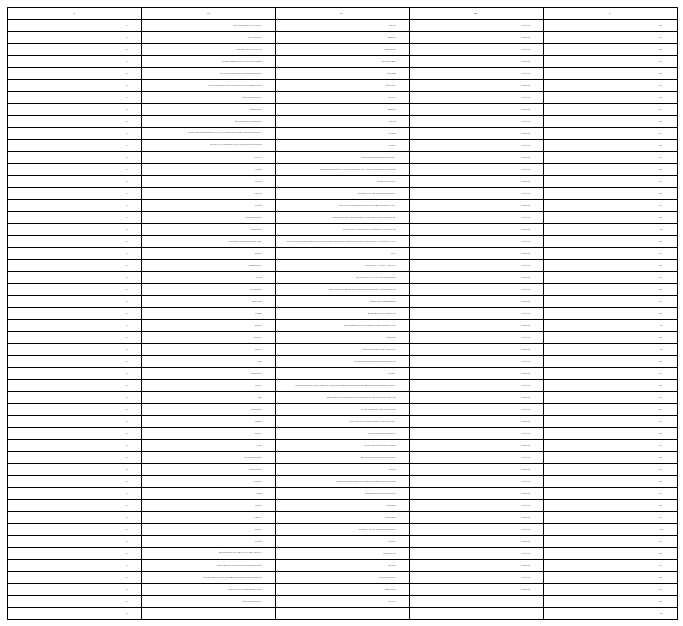

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Transform from dataframe to csv or pdf file
user_input = ""
while (user_input not in ["csv", "pdf"]):
    print("Choose the file type pdf or csv => ", end="")
    user_input = input().lower().strip()

# Get filename from the user
print("Enter the file name")
file_name = input()

if user_input == "csv":
    csv_folder = "files/csv/"  
    file_name += ".csv"
    df.to_csv(csv_folder + file_name, index=False)
else: 
    pdf_folder = "files/pdf/"
    file_name += ".pdf"
    
    #https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
    fig, ax =plt.subplots(figsize=(12,4))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=df.values,colLabels=df.columns,loc='center')

    #https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
    pp = PdfPages(pdf_folder + file_name)
    pp.savefig(fig, bbox_inches='tight')
    pp.close()